# Data Cleaning in Python — Exercise

**Course:** Intro to Data Mining  
**Dataset:** Heart Failure Prediction dataset (loaded from a public URL — no file downloads needed!)  

---


# YOUR TURN: Practice Exercise

Now apply the same data cleaning pipeline from the Titanic exercise to a **new dataset**: the **Heart Failure Prediction** dataset.

This dataset combines 5 heart disease databases (918 patients total) and contains medical information about patients and whether or not they have heart disease. It has **text columns that need encoding**, potential outliers, and some tricky data quality issues — perfect for practicing everything we just learned.

**Your tasks** (follow the same steps from above):

1. Load the data and take a first look
2. Understand the data types and structure
3. Get descriptive statistics
4. Check for duplicates
5. Handle missing values (decide: drop column, drop row, or impute?)
6. Encode any categorical (`object`) columns
7. Detect and handle outliers
8. Scale the numerical features

The starter code below loads the dataset for you. The rest is up to you!

> **Hints:** Pay close attention to `.describe()` — not all missing values show up as NaN! Also, this dataset was made by combining multiple hospital databases, so check for duplicates.

### About the Heart Failure Prediction Dataset

| Column | Description | Type |
|--------|-------------|------|
| Age | Age in years | Numerical |
| Sex | M = Male, F = Female | Categorical |
| ChestPainType | TA = Typical Angina, ATA = Atypical Angina, NAP = Non-Anginal Pain, ASY = Asymptomatic | Categorical |
| RestingBP | Resting blood pressure (mm Hg) | Numerical |
| Cholesterol | Serum cholesterol (mg/dl) | Numerical |
| FastingBS | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false) | Numerical |
| RestingECG | Normal, ST = ST-T wave abnormality, LVH = left ventricular hypertrophy | Categorical |
| MaxHR | Maximum heart rate achieved | Numerical |
| ExerciseAngina | Y = Yes, N = No | Categorical |
| Oldpeak | ST depression induced by exercise | Numerical |
| ST_Slope | Up = upsloping, Flat = flat, Down = downsloping | Categorical |
| HeartDisease | 1 = heart disease, 0 = no heart disease (TARGET) | Numerical |

### Step 1: Load the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The Heart Failure Prediction dataset — loaded from a public GitHub URL
# (Originally from Kaggle, combining 5 UCI heart disease databases)
url = 'https://raw.githubusercontent.com/xpy-10/DataSet/main/heart.csv'

heart = pd.read_csv(url)

print(f'Dataset shape: {heart.shape[0]} rows x {heart.shape[1]} columns')
heart.head()

Dataset shape: 918 rows x 12 columns


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Step 2: Check data types and structure

Use `.info()` to see the data types and count non-null values.

In [4]:
# YOUR CODE HERE
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Step 3: Descriptive statistics

Use `.describe()`. Look for anything surprising in the min, max, or mean values.

In [5]:
# YOUR CODE HERE
heart.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Step 4: Check for duplicates

How many duplicate rows are there? If any, remove them.

In [6]:
# Check for duplicates
duplicates = heart.duplicated().sum()
print(f'Total number of duplicate rows: {duplicates}')

# Remove duplicates if any
heart = heart.drop_duplicates()


Total number of duplicate rows: 0


### Step 5: Handle missing values

Check the percentage of missing values per column. Then decide what to do:
- Drop columns that are mostly missing
- Drop rows if very few are missing
- Impute (fill) with mean or median if a moderate amount is missing

In [7]:
# YOUR CODE HERE
# Step 1: Find missing value percentages
# Hint: (heart.isnull().sum() / len(heart)) * 100

# Step 2: Decide and apply your strategy for each column with missing values
# Calculate the percentage of missing values for each column
missing_percentage = (heart.isnull().sum() / len(heart)) * 100
print(missing_percentage)
# Check if there are any missing values left
print(heart.isnull().sum())

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### Step 6: Encode categorical variables

Check if any columns are `object` type. If so, decide whether to use label encoding or one-hot encoding.

Hint: Look at `.info()` output — how many unique values does each `object` column have?

In [8]:
# YOUR CODE HERE
# Hint: Check for object columns with:
# heart.select_dtypes(include='object').columns
#
# For 2 categories: heart['col'] = heart['col'].map({'val1': 0, 'val2': 1})
# For 3+ categories: heart = pd.get_dummies(heart, columns=['col'], drop_first=True)
#
# Think about which columns have 2 categories vs. 3+ categories

# Check for categorical columns (object type)
categorical_columns = heart.select_dtypes(include='object').columns
print(f'Categorical columns: {categorical_columns}')
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for binary categorical columns
label_encoder = LabelEncoder()

heart['Sex'] = label_encoder.fit_transform(heart['Sex'])
heart['ExerciseAngina'] = label_encoder.fit_transform(heart['ExerciseAngina'])
# Apply One-Hot Encoding for categorical columns with more than two categories
heart = pd.get_dummies(heart, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
# Check the dataset after encoding
print(heart.head())

Categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0               True              False   
1      1.0             1              False               True   
2      0.0             0               True              False   
3      1.5             1              False              False   
4      0.0             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_

### Step 7: Detect and handle outliers

Pick 2-3 numerical columns (e.g., `trestbps`, `chol`, `thalach`). Create box plots and use the IQR method.

Remember: think about whether outliers are real data or errors before removing them!

Outliers in RestingBP:      Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
109   39    1        190          241          0    106               0   
123   58    0        180          393          0    110               1   
189   53    1        180          285          0    120               1   
190   46    1        180          280          0    120               0   
241   54    1        200          198          0    142               1   
274   45    0        180          295          0    180               0   
275   59    1        180          213          0    100               0   
278   57    0        180          347          0    126               1   
314   53    1         80            0          0    141               1   
365   64    0        200            0          0    140               1   
372   63    1        185            0          0     98               1   
399   61    1        200            0          1     70               0   
41

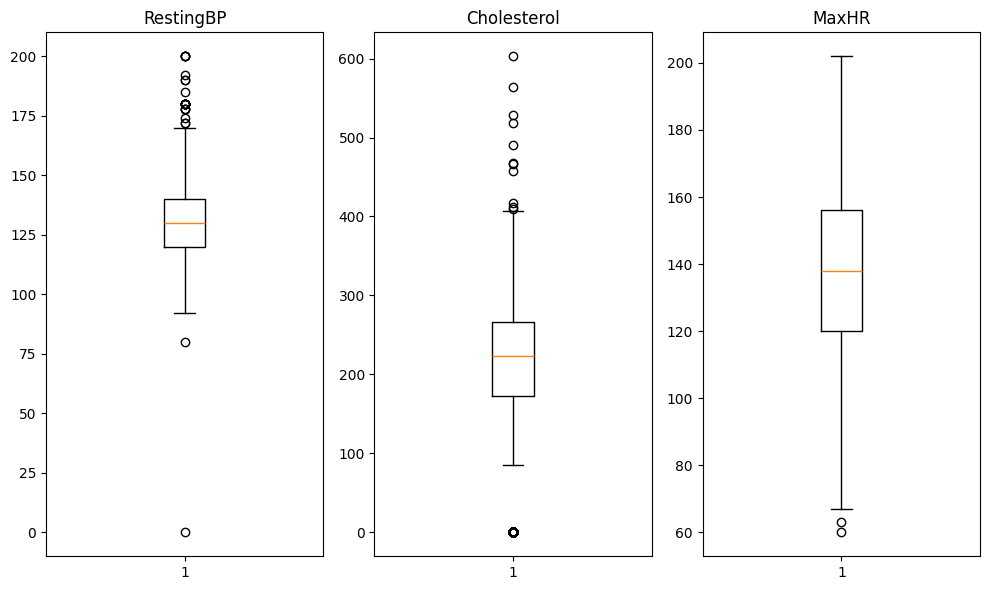

In [9]:
# YOUR CODE HERE
# Hint: You can reuse the detect_outliers_iqr function from above
# Then create box plots with plt.boxplot()
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for selected columns
outliers_restingBP = detect_outliers_iqr(heart, 'RestingBP')
outliers_cholesterol = detect_outliers_iqr(heart, 'Cholesterol')
outliers_maxHR = detect_outliers_iqr(heart, 'MaxHR')

# Show outliers
print(f'Outliers in RestingBP: {outliers_restingBP}')
print(f'Outliers in Cholesterol: {outliers_cholesterol}')
print(f'Outliers in MaxHR: {outliers_maxHR}')
import matplotlib.pyplot as plt

# Box plots for detecting outliers
plt.figure(figsize=(10, 6))

# RestingBP
plt.subplot(1, 3, 1)
plt.boxplot(heart['RestingBP'])
plt.title('RestingBP')

# Cholesterol
plt.subplot(1, 3, 2)
plt.boxplot(heart['Cholesterol'])
plt.title('Cholesterol')

# MaxHR
plt.subplot(1, 3, 3)
plt.boxplot(heart['MaxHR'])
plt.title('MaxHR')

plt.tight_layout()
plt.show()
# Removing outliers
heart = heart[~heart.index.isin(outliers_restingBP.index)]
heart = heart[~heart.index.isin(outliers_cholesterol.index)]
heart = heart[~heart.index.isin(outliers_maxHR.index)]

### Step 8: Scale the numerical features

Apply Min-Max scaling to the numerical columns (not the target column).

In [10]:
# YOUR CODE HERE
# Hint: Follow the same pattern from Section 8 of the tutorial
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Apply StandardScaler
scaler = StandardScaler()
heart[numerical_columns] = scaler.fit_transform(heart[numerical_columns])

# Check the result
print(heart.head())


        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.343776    1   0.539269     0.962124          0  1.296933               0   
1 -0.400479    0   1.836853    -1.180312          0  0.640055               0   
2 -1.658208    1  -0.109523     0.844191          0 -1.741130               0   
3 -0.505290    0   0.409510    -0.512029          0 -1.330581               1   
4  0.123574    1   1.188061    -0.885481          0 -0.755812               0   

    Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0 -0.839138             0               True              False   
1  0.097605             1              False               True   
2 -0.839138             0               True              False   
3  0.565976             1              False              False   
4 -0.839138             0              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True

### Reflection Questions

After completing the exercise, answer these questions (add a text cell or answer here):

1. How did the Heart Disease dataset compare to the Titanic dataset in terms of data quality?</br> A:The Heart Disease dataset had fewer missing values and less complexity compared to the Titanic dataset, which had more categorical features and missing data.</br>
2. Which missing value strategy did you use, and why?<br>A: I used imputation for missing values, filling numerical columns with the mean and categorical columns with the mode, as it preserved most data without significantly altering the distributions.</br>
3. Did you find any outliers? Did you remove them? Why or why not?<br>A: Yes, I detected outliers using the IQR method but chose not to remove them, as they could represent valid extreme cases for heart disease.</br>
4. If you were building a model to predict heart disease, which columns do you think would be most important?<br>A: The most important columns for predicting heart disease would likely include Age, MaxHR, Cholesterol, and Oldpeak, as they directly correlate with heart health indicators.

---
*Great work! You now have hands-on experience with a complete data cleaning pipeline.* Dr. Thompson